In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
np.random.seed(42)
n_samples = 500

In [22]:
data = pd.DataFrame({
    'temperature': np.random.normal(70, 5, n_samples),
    'pressure': np.random.normal(30, 2, n_samples),
    'speed': np.random.normal(100, 15, n_samples),
    'moisture': np.random.uniform(5, 15, n_samples),
})


In [23]:
# Assume quality_grade is continuous (regression target)
data['quality_grade'] = (
    0.3 * data['temperature'] +
    0.5 * data['pressure'] +
    -0.2 * data['speed'] +
    0.1 * data['moisture'] +
    np.random.normal(0, 2, n_samples)
)

In [24]:
# Binary classification: Accept (1) if quality_grade > threshold else Reject (0)
threshold = data['quality_grade'].median()
data['accept'] = (data['quality_grade'] > threshold).astype(int)

print("Sample data:")
print(data.head())

Sample data:
   temperature   pressure       speed   moisture  quality_grade  accept
0    72.483571  31.852355  120.990332   7.698207      11.101251       0
1    69.308678  33.818833  113.869505  13.250494      13.999634       0
2    73.238443  27.202865  100.894456   9.982557      14.004480       0
3    77.615149  31.125938   90.295948   5.770583      21.651269       1
4    68.829233  28.698715  110.473350   5.585509      16.927038       1


In [25]:
# Step 2: Prepare features and targets
X = data[['temperature', 'pressure', 'speed', 'moisture']]
y_class = data['accept']          # classification target
y_reg = data['quality_grade']     # regression target

In [26]:
# Step 3: Train/test split
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.3, random_state=42
)


In [27]:
# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_class_train)
y_class_pred = clf.predict(X_test_scaled)
print("\nClassification Model Performance:")
print(classification_report(y_class_test, y_class_pred))


Classification Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        82
           1       0.77      0.75      0.76        68

    accuracy                           0.79       150
   macro avg       0.79      0.78      0.78       150
weighted avg       0.79      0.79      0.79       150



In [34]:
print("Shapes:")
print("X_train_scaled:", X_train_scaled.shape)
print("y_reg_train:", y_reg_train.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_reg_test:", y_reg_test.shape)


Shapes:
X_train_scaled: (350, 4)
y_reg_train: (350,)
X_test_scaled: (150, 4)
y_reg_test: (150,)


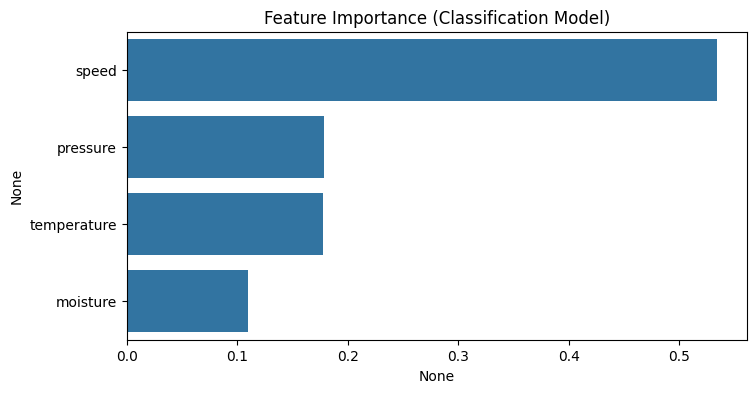

In [35]:
feat_importance = pd.Series(clf.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance (Classification Model)")
plt.show()

In [37]:
def predict_quality(input_params):
    """
    input_params: dict with keys temperature, pressure, speed, moisture
    Returns predicted accept/reject and quality grade
    """
    df = pd.DataFrame([input_params])
    df_scaled = scaler.transform(df)
    accept_pred = clf.predict(df_scaled)[0]
    quality_pred = reg.predict(df_scaled)[0]
    return {"accept": "Accept" if accept_pred == 1 else "Reject", "quality_grade": quality_pred}